## Analyse der Daten über die Sonneneruptionen
Im vorliegenden Notizbuch werden die aufbereiteten Daten der Sonneneruptionen analysiert. Wichtig zu erwähnen ist, das nur ein Teil der Datenanalyse in dieser Datei durchgeführt wurden. Der zweite Teil der Datenanalyse wurde in RStudio gemacht und befindet sich in der Datei ''.

## Inhaltsverzeichnis

1. [Importe](#1.-Importe)<br>
2. [Daten laden](#2.-Daten-laden)<br>
3. [Statistische Kennzahlen](#3.-Statistische-Kennzahlen)<br>
4. [Datenanalyse](#4.-Datenanalyse)<br>
    4.1 [Balkendiagramm monatlicher Durchschnitt 1975 bis 2016 (Abbildung 11)](#4.1-Balkendiagramm-monatlicher-Durchschnitt-1975-bis-2016-(Abbildung-11))<br>
    4.2 [Boxplot inkl. Ausreisser (Abbildung 13)](#4.2-Boxplot-inkl.-Ausreisser-(Abbildung-13))<br>
    4.3 [Boxplot ohne Ausreisser (Abbildung 14)](#4.3-Boxplot-ohne-Ausreisser-(Abbildung-14))<br>
    4.4 [Histogramm Intensität Sonneneruptionen (Abbildung 15)](#4.4-Histogramm-Intensität-Sonneneruptionen-(Abbildung-15))<br>
    4.5 [Intensität von Sonneneruptionen pro Tag 18.10.2003 – 08.11.2003 (Abbildung 16)](#4.5-Intensität-von-Sonneneruptionen-pro-Tag-18.10.2003-–-08.11.2003-(Abbildung-16))<br>
    4.6 [Halloween Sonnenstürme: Intensität der Sonneneruption und Perzentil](#4.6-Halloween-Sonnenstürme:-Intensität-der-Sonneneruption-und-Perzentil)<br>
    4.7 [Survial Function (Überlebensfunktion)](#4.7-Survial-Function-(Überlebensfunktion))<br>
    4.8 [Zipf-Plot](#4.8-Zipf-Plot)<br>
    4.9 [QQ-Plot](#4.9-QQ-Plot)<br>
    4.10 [Werte von verschiedenen Perzentilen](#4.10-Werte-von-verschiedenen-Perzentilen)<br>

## 1. Importe

In [1]:
from datetime import datetime
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore
import seaborn as sns
import statsmodels.api as sm

## 2. Daten laden
Die aufbereiteten Daten wurden in der CSV-Datei 'df_extreme' gespeichert und werden mit folgenden Code in das Dataframe XYZ geladen.

In [2]:
# importiere die Datei 'df_extreme.csv' in das Dataframe df_sf
df_sf = pd.read_csv('data_files/df_extreme.csv', sep=',')

# Benenne die erste Spalte als 'date'
df_sf.rename(columns={ df_sf.columns[0]: "date" }, inplace = True)

# Wandle die Spalte 'date' in ein Datumsformat um
df_sf['date'] = pd.to_datetime(df_sf['date'])

# Setze die Spalte 'Date' als Index
df_sf.set_index('date', inplace=True)

## 3. Statistische Kennzahlen

In [3]:
print(df_sf.XRay_class_nr1.describe(include='all'))
print("Modus: ", df_sf.XRay_class_nr1.mode())

count    1.503300e+04
mean     1.425635e-05
std      7.191678e-05
min      0.000000e+00
25%      1.300000e-07
50%      1.400000e-06
75%      7.000000e-06
max      2.800000e-03
Name: XRay_class_nr1, dtype: float64
Modus:  0    0.0
Name: XRay_class_nr1, dtype: float64


## 4. Datenanalyse

### 4.1 Balkendiagramm monatlicher Durchschnitt 1975 bis 2016 (Abbildung 11)

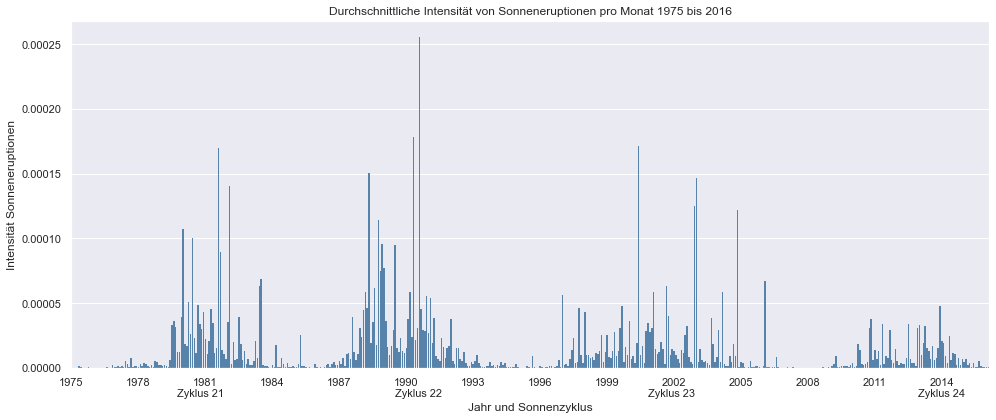

In [21]:
# Nehme den monatlichen Durchschnitt
df_sf_month = df_sf.resample('M').mean()

# Erstelle ein Balkendiagramm
plt.figure(figsize=(12, 6), tight_layout=True)
ax = sns.barplot(x=df_sf_month.index, y=df_sf_month['XRay_class_nr1'], color='#4984b8', lw= 0)

# Erstelle Labels für die Jahre und die Sonnenzyklen
ticklabels = ['']*len(df_sf_month.index)
ticklabels[::36] = ['1975', '1978', '1981\nZyklus 21   ', '1984', '1987',
                     '1990\n        Zyklus 22', '1993', '1996', '1999', '2002\nZyklus 23  ', '2005',
                     '2008', '2011', '2014\nZyklus 24']

# Labels und Titel definieren
ttl = "Durchschnittliche Intensität von Sonneneruptionen pro Monat 1975 bis 2016"
ax.set(title=ttl, xlabel='Jahr und Sonnenzyklus', ylabel='Intensität Sonneneruptionen')

# Setze die erstellen Labels an die X-Achse
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

# Verändere die Breite und Höhe des Plots
fig = plt.gcf()
fig.set_size_inches(14, 6)

plt.show()

### 4.2 Boxplot inkl. Ausreisser (Abbildung 13)

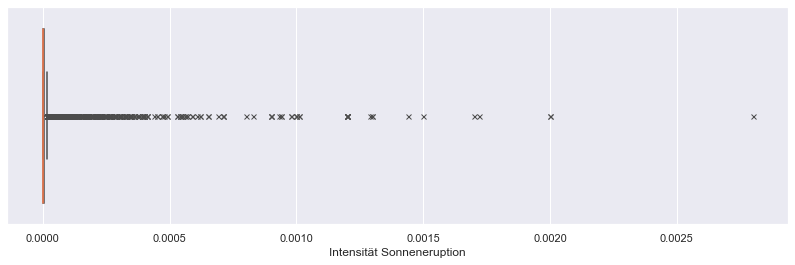

In [22]:
sns.boxplot(
    data=df_sf, x="XRay_class_nr1",
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
)

sns.set(rc={"figure.figsize":(14,4)}) # Ändere die Grösse des Plots
plt.xlabel("Intensität Sonneneruption") # Setze das Label der X-Achse
plt.show() # Zeige den Plot an

### 4.3 Boxplot ohne Ausreisser (Abbildung 14)

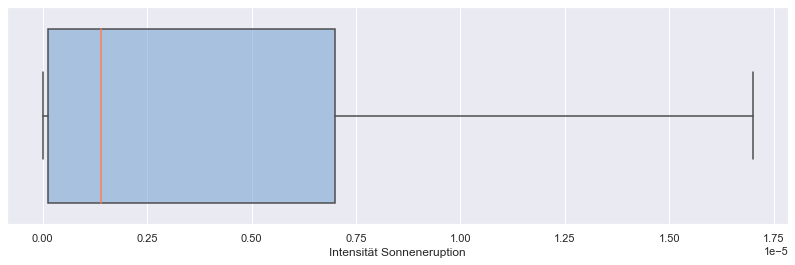

In [6]:
sns.boxplot(
    data=df_sf, x="XRay_class_nr1",
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
    showfliers = False # Ausreisser nicht anzeigen
)

sns.set(rc={"figure.figsize":(14,4)}) # Ändere die Grösse des Plots
plt.xlabel("Intensität Sonneneruption") # Setze das Label der X-Achse
plt.show() # Zeige den Plot an

### 4.4 Histogramm Intensität Sonneneruptionen (Abbildung 15)

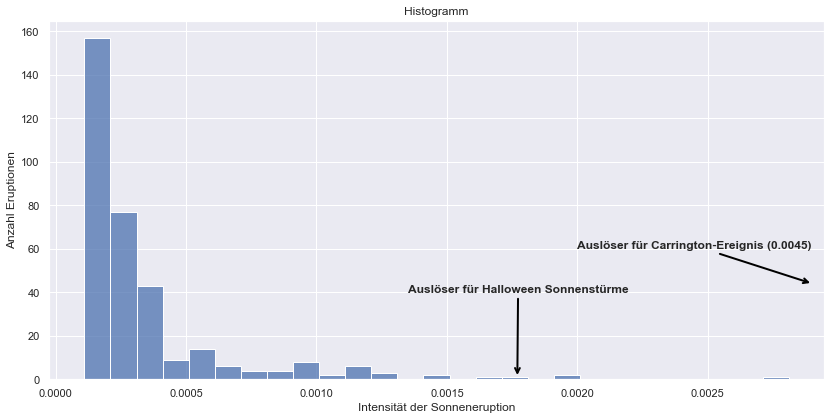

In [7]:
# erstelle ein Histogramm
plt.figure(figsize=(12, 6), tight_layout=True)

# die Breite von 10 wird genommen, damit die Verteilung besser aussieht
ax2 = sns.histplot(data=df_sf.XRay_class_nr1[df_sf.XRay_class_nr1 > 0.0001], binwidth=0.0001, legend=False)

# Labels und Titel definieren
ax2.set(title='Histogramm', xlabel='Intensität der Sonneneruption', ylabel='Anzahl Eruptionen')

# Sonneneruption der Stärke X17.2 (Auslöser für Halloween Sonnenstürme) markieren
plt.annotate('Auslöser für Halloween Sonnenstürme', xy=(0.00177, 1), xytext=(0.00135, 40),
             fontsize=12, fontweight='bold', 
             arrowprops=dict(ec="black",arrowstyle='->',lw=2), zorder=4)

# Darstellen, dass Sonneneruption der Stärke X45 (wie Carrington-Ereignis) weit über dem höchsten Wert dieser Daten ist
plt.annotate('Auslöser für Carrington-Ereignis (0.0045)', xy=(0.0029, 44), xytext=(0.002, 60),
             fontsize=12, fontweight='bold', 
             arrowprops=dict(ec="black",arrowstyle='->',lw=2), zorder=4)

plt.show()

### 4.5 Intensität von Sonneneruptionen pro Tag 18.10.2003 – 08.11.2003 (Abbildung 16)

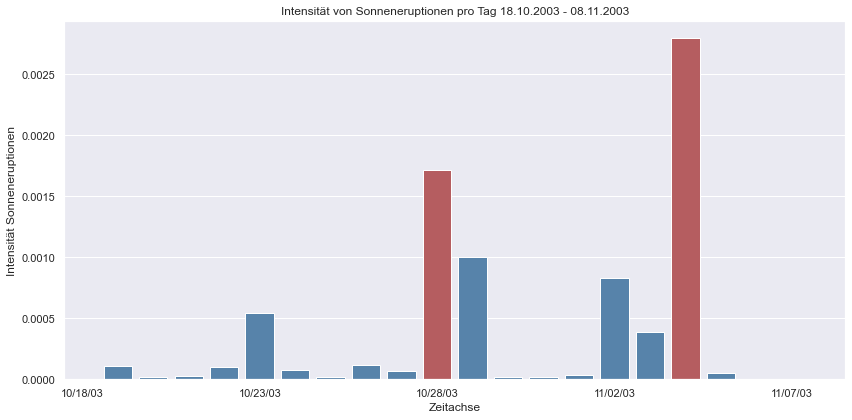

In [8]:
# Nehme die Daten aus dem Zeitraum 18.10.2003 bis 08.11.2003
df_sf_2003 = df_sf[(df_sf.index >= '2003-10-18') & (df_sf.index <= '2003-11-08')]

# Die Tage der Sonneneruptionen mit der Stärke X17.2 (28.10.2003)
# und X28 (04.11.2003) den Variablen date_1 und date_2 zuordnen
date_1 = datetime.strptime('10-28-2003', '%m-%d-%Y')
date_2 = datetime.strptime('11-04-2003', '%m-%d-%Y')

# Die Tage 28.10.2003 und 04.11.2003 mit einer roten Markierung hervorheben
clrs = ['r' if x in (date_1, date_2) else '#4984b8' for x in df_sf_2003.index]

# Erstelle ein Balkendiagramm
plt.figure(figsize=(12, 6), tight_layout=True)
ax = sns.barplot(x=df_sf_2003.index, y=df_sf_2003['XRay_class_nr1'], palette=clrs)

# Erstelle Labels für Tage im 5-Tages-Rhythmus
ticklabels = ['']*len(df_sf_2003.index)
ticklabels[::5] = [item.strftime('%D') for item in df_sf_2003.index[::5]]

# Labels und Titel definieren
ttl = "Intensität von Sonneneruptionen pro Tag 18.10.2003 - 08.11.2003"
ax.set(title=ttl, xlabel='Zeitachse', ylabel='Intensität Sonneneruptionen')

# Setze die erstellen Labels an die X-Achse
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

plt.show()

### 4.6 Halloween Sonnenstürme: Intensität der Sonneneruption und Perzentil

In [9]:
# Die Sonneneruption von 28.10.2003 wird der Klasse X17.2 (0.00172) zugeordnet
df_sf.loc['2003-10-28']

XRay_class_nr1    0.00172
Name: 2003-10-28 00:00:00, dtype: float64

In [10]:
# An welchem Perzentil befindet sich die Anzahl Sonnenflecken von 0.00172?
percentile = percentileofscore(df_sf['XRay_class_nr1'], 0.00172)
print("Die Zahl 0.00172 liegt im " + str(percentile) + " Perzentil.")

Die Zahl 0.00172 liegt im 99.9800439034125 Perzentil.


### 4.7 Survial Function (Überlebensfunktion)

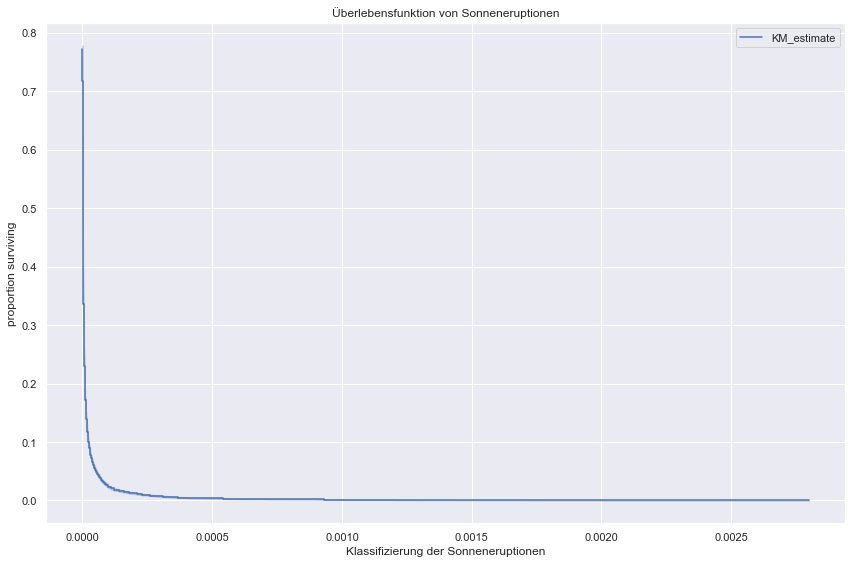

In [11]:
# Importieren des Dataframes, welches für die Survival Function erstellt wurde
df_survival = pd.read_csv('data_files/survival_sf.csv', sep=';')

# Erstelle die Survival Function nach "Kaplan Meier"
plt.figure(figsize=(12, 8), tight_layout=True)
kmf = KaplanMeierFitter()
kmf.fit(durations=df_survival['XRay_class_nr1'], event_observed=df_survival['count'])
kmf.plot_survival_function()

# Labels und Titel definieren
plt.title('Überlebensfunktion von Sonneneruptionen')
plt.xlabel('Klassifizierung der Sonneneruptionen')
plt.ylabel('proportion surviving')
plt.show()

### 4.8 Zipf-Plot

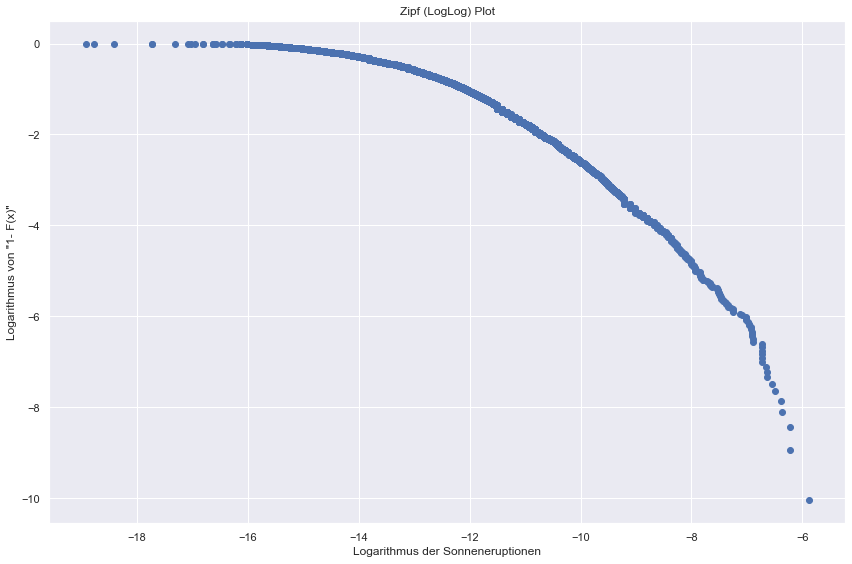

In [12]:
# Nachstellung der ppoints-Funktion aus R
def ppoints(n, a):
    """ numpy analogue or `R`'s `ppoints` function
        see details at http://stat.ethz.ch/R-manual/R-patched/library/stats/html/ppoints.html 
        :param n: array type or number"""
    try:
        n = float(len(n))
    except TypeError:
        n = float(n)
    return (np.arange(n) + 1 - a)/(n + 1 - 2*a)

# Packe die Daten der Survival Function über 0 in das Dataframe data_zipf 
data_zipf = df_survival[(df_survival['XRay_class_nr1'] > 0)].XRay_class_nr1

# Generiere die Daten für die Y-Achse mittel der ppoints-Funktion
y_data = 1 - ppoints(data_zipf,1./2)

# Streudiagramm erstellen
plt.figure(figsize=(12, 8), tight_layout=True)
plt.scatter(x=np.log(data_zipf), y=np.log(y_data))

# Achsenbeschriftungen setzen
plt.xlabel('Logarithmus der Sonneneruptionen')
plt.ylabel('Logarithmus von "1- F(x)"')
plt.title('Zipf (LogLog) Plot')

# Zeige im Hintergrund Gitter an
plt.grid(True)

# Diagramm anzeigen
plt.show()

### 4.9 QQ-Plot
Das zweite Diagramm vergleicht die Daten der Sonneneruptionen mit dem QQ-Plot einer Normalverteilung. Dadurch lässt sich interpretieren, dass die Daten nicht Normalverteilt sind.

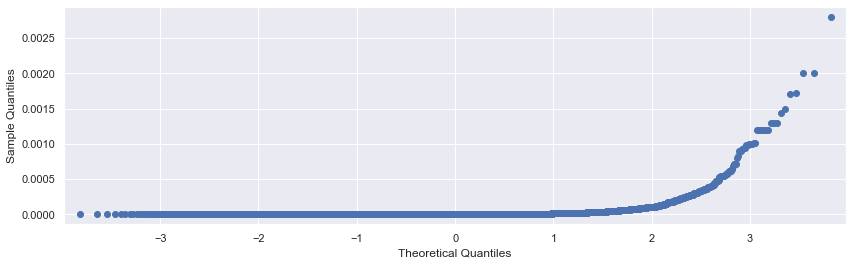

In [13]:
## QQ-Plot
sm.qqplot(df_sf.XRay_class_nr1)
plt.show()

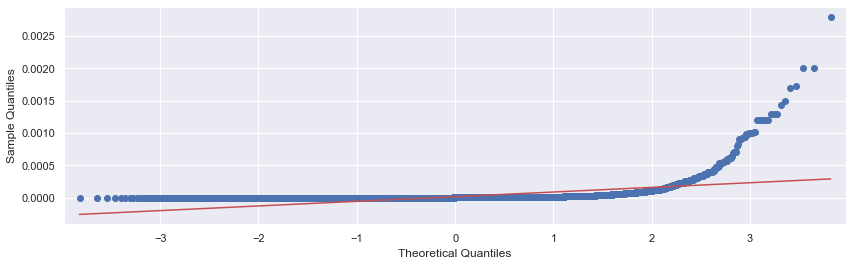

In [14]:
# QQ-Plot im Vergleich zu einer Normalverteilung (rote Linie)
sm.qqplot(df_sf.XRay_class_nr1, line ='s')
plt.show()

### 4.10 Werte von verschiedenen Perzentilen

In [15]:
# Eine Sonneneruption der Klasse X1 entspricht dem Wert 0.0001
# Hole das Perzentil des Wertes 0.0001
percentile = percentileofscore(df_sf['XRay_class_nr1'], 0.0001)
print("Der Wert 0.0001 liegt im " + str(percentile) + " Perzentil.")

Der Wert 0.0001 liegt im 97.61192044169493 Perzentil.


In [16]:
# Hole das Perzentil des Wertes 0.00001
percentile = percentileofscore(df_sf['XRay_class_nr1'], 0.00001)
print("Der Wert 0.00001 liegt im " + str(percentile) + " Perzentil.")

Der Wert 0.00001 liegt im 80.92862369453869 Perzentil.


In [17]:
# Hole den Wert des 96. Perzentils
percentile = np.percentile(df_sf['XRay_class_nr1'], 96)
print("Das 96. Perzentil entspricht dem Wert " + str(percentile) + ".")

Das 96. Perzentil entspricht dem Wert 6.6e-05.


In [18]:
# Hole den Wert von Perzentil 97.6
percentile = np.percentile(df_sf['XRay_class_nr1'], 97.6)
print("Das Perzentil 97.6 entspricht dem Wert " + str(percentile) + ".")

Das Perzentil 97.6 entspricht dem Wert 0.0001.


In [19]:
# Hole den Wert von Perzentil 99.1
percentile = np.percentile(df_sf['XRay_class_nr1'], 99.1)
print("Das Perzentil 99.1 entspricht dem Wert " + str(percentile) + ".")

Das Perzentil 99.1 entspricht dem Wert 0.00026.


In [20]:
# Hole den Wert von Perzentil 99.55
percentile = np.percentile(df_sf['XRay_class_nr1'], 99.55)
print("Das Perzentil 99.55 entspricht dem Wert " + str(percentile) + ".")

Das Perzentil 99.55 entspricht dem Wert 0.0004.
